# Insights on Review Dataset

In [2]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

## Summary of the Data

### Import the Cleaned Dataset of Review & shape of the data
* _Preprocessing the dataset is done in review_data_inspect.ipynb_

In [2]:
df = pd.read_feather("../data/yelp_review_cleaned.feather")
print(f"There are {df.shape[0]} review records with {df.shape[1]} total features.")
df.head(3)

There are 5257329 review records with 9 total features.


,review_id,user_id,business_id,text,date,stars,useful,funny,cool
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,-0.577114,-0.365960,-0.184315,-0.229438
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,-0.577114,-0.365960,-0.184315,-0.229438
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,0.858133,-0.007821,-0.184315,0.224182


### Data Types

In [3]:
# data types of review dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5257329 entries, 0 to 5257328
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   text         object        
 4   date         datetime64[ns]
 5   stars        float64       
 6   useful       float64       
 7   funny        float64       
 8   cool         float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 361.0+ MB


### Numeric Variables 

#### Descriptive statistics such as mean, max, min, std

In [4]:
# Focusing on numerica variables
df[['stars', 'useful','funny','cool']].describe()

,stars,useful,funny,cool
count,5.257329e+06,5.257329e+06,5.257329e+06,5.257329e+06
mean,1.150474e-13,3.171765e-13,-1.903410e-13,-1.795072e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.012361e+00,-7.241003e-01,-7.627253e-01,-6.830580e-01
25%,-5.771139e-01,-3.659604e-01,-1.843155e-01,-2.294381e-01
50%,1.405098e-01,-3.659604e-01,-1.843155e-01,-2.294381e-01
75%,8.581335e-01,-7.820544e-03,-1.843155e-01,-2.294381e-01
max,8.581335e-01,1.500528e+02,4.579163e+02,1.830330e+02


In [5]:
mean_stars = df["stars"].mean() 
mean_useful = df["useful"].mean()
mean_funny = df['funny'].mean()
mean_cool = df['cool'].mean()

min_stars = df['stars'].min()
min_useful = df['useful'].min()
min_funny = df['funny'].min()
min_cool = df['cool'].min()

max_stars = df['stars'].max()
max_useful = df['useful'].max()
max_funny = df['funny'].max()
max_cool = df['cool'].max()

print(
    "\n"
    f"The mean stars is {mean_stars:.4f} \n"
    f"The mean number of useful is {mean_useful:.4f} \n"
    f"The mean number of funny is {mean_funny:.4f} \n"
    f"The mean number of cool is {mean_cool:.4f} \n"
    f"The minimum and maximum values of stars is {min_stars:.4f} and {max_stars:.4f}\n"
    f"The minimum and maximum values of useful is {min_useful:.4f} and {max_useful:.4f}\n"
    f"The minimum and maximum values of funny is {min_funny:.4f} and {max_funny:.4f}\n"
    f"The minimum and maximum values of cool is {min_cool:.4f} and {max_cool:.4f}"
)


The mean stars is 0.0000 
The mean number of useful is 0.0000 
The mean number of funny is -0.0000 
The mean number of cool is -0.0000 
The minimum and maximum values of stars is -2.0124 and 0.8581
The minimum and maximum values of useful is -0.7241 and 150.0528
The minimum and maximum values of funny is -0.7627 and 457.9163
The minimum and maximum values of cool is -0.6831 and 183.0330


#### Correlation Check on Numeric Variables

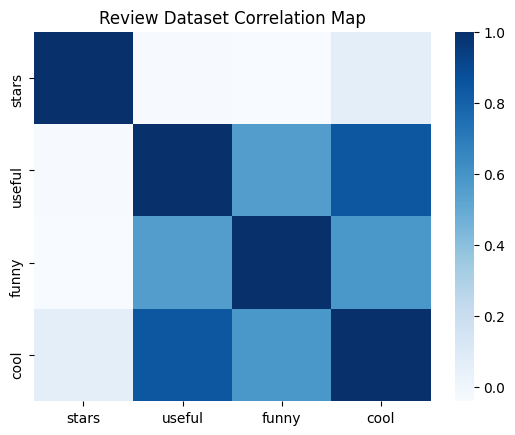

In [6]:
cor = df.corr()
sns.heatmap(cor, cmap = 'Blues')
plt.title("Review Dataset Correlation Map")
plt.show()

## Deeper Understanding of the Data

### Checking the counts of reviews by business

In [7]:
review_count_by_business = df.groupby('business_id')['review_id'].count().sort_values(ascending=False)
review_count_by_business

business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
                          ... 
4uEND5go9zoJyqbuO2xDWg       5
HpQPUBiALc8TXFv4KMONKQ       5
1P1xD7dYMrd9VseziFi0bQ       5
gayQ5JeBfFF1bTYdGu6tgg       5
7K-VVWa_nZgviO39sPfd2A       5
Name: review_id, Length: 68054, dtype: int64

There are 68054 business received reviews.


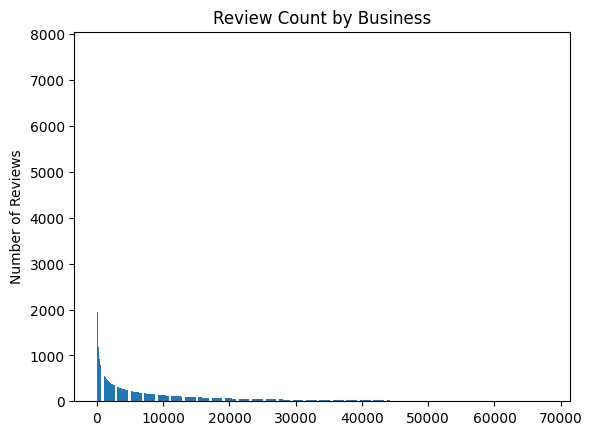

In [8]:
plt.bar(np.arange(review_count_by_business.shape[0]), review_count_by_business);
plt.title('Review Count by Business')
plt.ylabel('Number of Reviews')
print(f"There are {len(review_count_by_business)} business received reviews.")
plt.show()

* There is an imbalance of the number of reviews received by each business
* But, we will not mitigate this imbalance since the number of reviews acts as an indicator for popularity, under-sampling some of the popular restaurants will likely hurt the performance of our model.

### Check the number of reviews by `state`

#### Merge `State` column from Business Dataset to check the distribution of reviews based on the states

In [9]:
business = pd.read_feather("../data/yelp_business_cleaned.feather")
business.head(1)

,original_index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,music_live,music_video,music_karaoke,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,...,None,None,None,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0


In [10]:
merge = pd.merge(df, business, on='business_id', how='outer')
merge.head(2)

,review_id,user_id,business_id,text,date,stars_x,useful,funny,cool,original_index,...,music_live,music_video,music_karaoke,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,-0.577114,-0.36596,-0.184315,-0.229438,1867,...,None,None,None,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,This is the second time we tried turning point...,2017-05-13 17:06:55,-1.294738,-0.36596,-0.184315,-0.229438,1867,...,None,None,None,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0


#### Keep original columns from review dataset and `State`, `Name`, `City` from Business Data

In [11]:
# list the original columns in the review dataset
df.columns

Index(['review_id', 'user_id', 'business_id', 'text', 'date', 'stars',
       'useful', 'funny', 'cool'],
      dtype='object')

In [12]:
merge = merge[['review_id', 'user_id', 'business_id', 'text', 'date', 'stars_x',
       'useful', 'funny', 'cool','state','city','name']].rename(columns={'stars_x':'stars'})
print(f"There are {merge.shape[0]} review records with {merge.shape[1]} total features.")

There are 5257329 review records with 12 total features.


In [13]:
merge.head(3)

,review_id,user_id,business_id,text,date,stars,useful,funny,cool,state,city,name
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,-0.577114,-0.365960,-0.184315,-0.229438,PA,North Wales,Turning Point of North Wales
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,This is the second time we tried turning point...,2017-05-13 17:06:55,-1.294738,-0.365960,-0.184315,-0.229438,PA,North Wales,Turning Point of North Wales
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,The place is cute and the staff was very frien...,2017-08-08 00:58:18,0.140510,0.350319,-0.184315,0.224182,PA,North Wales,Turning Point of North Wales


#### Count each `state`: numbers of reviews

In [14]:
state_count_by_business = merge.groupby('state')['business_id'].count().sort_values(ascending=False)
state_count_by_business

state
PA    1214380
FL     873392
LA     622762
TN     480381
MO     392605
IN     378521
AZ     296986
NV     276845
CA     245014
NJ     191125
ID     112915
AB      79000
DE      53198
IL      40205
Name: business_id, dtype: int64

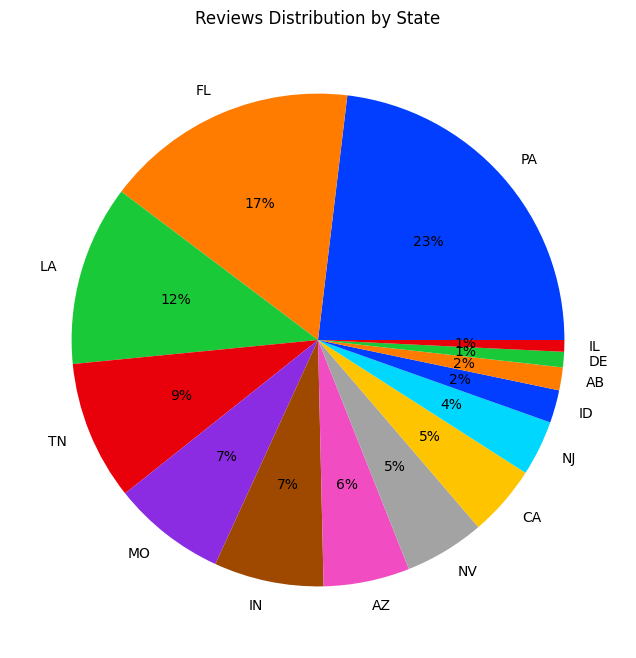

In [15]:
# Pie plot to see the portion as well
plt.figure(figsize=(10,8))
colors = sns.color_palette('bright')[0:14]
plt.pie(state_count_by_business.array, labels=state_count_by_business.index, colors = colors, autopct='%.0f%%')
plt.title("Reviews Distribution by State")
plt.show()

* We can see that Pennsylavnia has the largest amount of reviews from the user on business whereas Illinois has the smallest amount of reviews among the states we have in the dataset.

In [16]:
merge.reset_index(drop=True).to_csv('../data/yelp_review_merged.csv')

### Check the number of reviews by `user_id`

In [17]:
user_count = merge.groupby(by=["user_id"])['business_id'].count().sort_values(ascending=False)
user_count

user_id
_BcWyKQL16ndpBdggh2kNA    2146
-G7Zkl1wIWBBmD0KRy_sCw    1462
1HM81n6n4iPIFU5d2Lokhw    1325
ET8n-r7glWYqZhuR6GcdNw    1321
Xw7ZjaGfr0WNVt6s_5KZfA    1283
                          ... 
Yma0KF3Sz8fLGt4BMgp4qw       1
Ym_zry1BWV9mC_rQ82R18Q       1
Ym_yzdsmf_4pMYW_PpqXOw       1
Ym_g2M-o8Oet9FxBW5sV8w       1
zzzUFM4HFe0SFG0bPjntQA       1
Name: business_id, Length: 1532233, dtype: int64

In [18]:
# checking unique users
print(f"{len(user_count)} users have written the {merge.shape[0]} reviews on business in the dataset.")

1532233 users have written the 5257329 reviews on business in the dataset.


In [19]:
# checking unique users with more than 10 reviews written
user_count = user_count.to_frame()
users_aboveten = user_count[user_count['business_id'] > 10]['business_id']
print(f"There are {users_aboveten.shape[0]} users who have written more than 10 reviews on businesses.")

There are 76869 users who have written more than 10 reviews on businesses.


In [20]:
# Checking top five reviewers
users_aboveten

user_id
_BcWyKQL16ndpBdggh2kNA    2146
-G7Zkl1wIWBBmD0KRy_sCw    1462
1HM81n6n4iPIFU5d2Lokhw    1325
ET8n-r7glWYqZhuR6GcdNw    1321
Xw7ZjaGfr0WNVt6s_5KZfA    1283
                          ... 
X3Cxf9v0gDuQAC1fL8pm-g      11
InZF69K1u6jY1jh8OHBbGg      11
X3Cqj9LnFZ44IV12sh6WyA      11
WEnfD0P8fBjMvZ0Pzh22SA      11
Ajl-q1qJhk6BYXiihW7p8g      11
Name: business_id, Length: 76869, dtype: int64

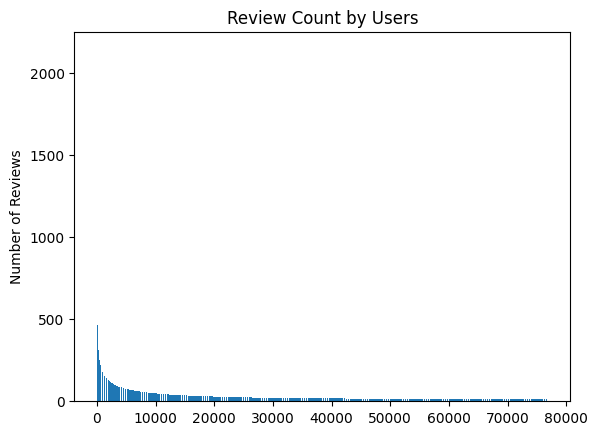

In [21]:
# Plot the counts of reviews by users
plt.bar(np.arange(users_aboveten.shape[0]), users_aboveten);
plt.title('Review Count by Users')
plt.ylabel('Number of Reviews')
plt.show()

* Did not use pie chart becuase there are too many unique users.
* There is an imbalance of the number of reviews writeen by the users.
* Same logic applies to the number of reviews received by the business.
* We will not mitigate this imbalance since the number of reviews acts as an indicator for user's activeness, under-sampling some of the users will likely hurt the performance of our model.

## Sentiment Analysis

In [22]:
# create a new dataframe without numeric variables
sent = merge.loc[:, ['review_id', 'user_id', 'business_id', 'text', 'date']].copy()
sent.dropna(inplace = True)
sent.head()

,review_id,user_id,business_id,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,This is the second time we tried turning point...,2017-05-13 17:06:55
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,The place is cute and the staff was very frien...,2017-08-08 00:58:18
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47


In [23]:
analyzer = SIA()
# using sentiment analysis and get negative, neutral, poisitve scores on columns "rating"
sent['rating'] = sent['text'].apply(analyzer.polarity_scores)
sent.head()

,review_id,user_id,business_id,text,date,rating
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp..."
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,This is the second time we tried turning point...,2017-05-13 17:06:55,"{'neg': 0.052, 'neu': 0.92, 'pos': 0.028, 'com..."
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,The place is cute and the staff was very frien...,2017-08-08 00:58:18,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp..."
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,"{'neg': 0.014, 'neu': 0.907, 'pos': 0.079, 'co..."
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47,"{'neg': 0.087, 'neu': 0.805, 'pos': 0.107, 'co..."


In [25]:
# saved the dataframe to prevent kernel crash
sent.to_csv('../data/sentiment.csv')